### Importing Libraries

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import joblib

In [25]:

import math
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Processed Data
 

In [26]:
IMDB_data_NoDup = "../../data/processed/IMDB_data_NoDup.csv"
IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, nrows = 10000)
IMDB_data_NoDup.head(2)

,Index,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,...,Dir_knownForTitles,Age_of_movie,Director_age,Decade,P_writer,P_director,P_actor,genere1,genere2,genere3
0,0,tt0000019,The Clown Barber,GB,short,1898.0,"Comedy,Short",nm0932055,0,5.3,...,"tt0050976,tt0050986,tt0060827,tt0069467",124.0,89.0,D6,writer,director,actor,Comedy,Short,0
1,1,tt0232670,The Soldier's Return,GB,short,1903.0,"Drama,Short",nm0932055,0,5.4,...,"tt0050976,tt0050986,tt0060827,tt0069467",119.0,89.0,D6,writer,director,actor,Drama,Short,0


In [27]:
IMDB_data_NoDup = IMDB_data_NoDup.set_index("Index")
#IMDB_data_NoDup.head()
IMDB_data_NoDup.reset_index(inplace=True)

In [6]:
IMDB_data_NoDup.head()

,Index,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,...,Dir_knownForTitles,Age_of_movie,Director_age,Decade,P_writer,P_director,P_actor,genere1,genere2,genere3
0,0,tt0000019,The Clown Barber,GB,short,1898.0,"Comedy,Short",nm0932055,0,5.3,...,"tt0050976,tt0050986,tt0060827,tt0069467",124.0,89.0,D6,writer,director,actor,Comedy,Short,0
1,1,tt0232670,The Soldier's Return,GB,short,1903.0,"Drama,Short",nm0932055,0,5.4,...,"tt0050976,tt0050986,tt0060827,tt0069467",119.0,89.0,D6,writer,director,actor,Drama,Short,0
2,2,tt0271697,Our New Errand Boy,GB,short,1905.0,"Comedy,Short",nm0932055,0,5.4,...,"tt0050976,tt0050986,tt0060827,tt0069467",117.0,89.0,D6,writer,director,actor,Comedy,Short,0
3,3,tt0273227,The Forbidden Lover,GB,short,1898.0,"Comedy,Short",nm0932055,nm0932055,4.4,...,"tt0050976,tt0050986,tt0060827,tt0069467",124.0,89.0,D6,writer,director,actor,Comedy,Short,0
4,4,tt0274176,Two Naughty Boys Sprinkling the Spoons,GB,short,1898.0,"Comedy,Short",nm0932055,nm0932055,4.4,...,"tt0050976,tt0050986,tt0060827,tt0069467",124.0,89.0,D6,writer,director,actor,Comedy,Short,0


In [7]:
IMDB_data_NoDup.shape

(10000, 25)

In [8]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Index                       10000 non-null  int64  
 1   titleId                     10000 non-null  object 
 2   title                       10000 non-null  object 
 3   region                      10000 non-null  object 
 4   titleType                   10000 non-null  object 
 5   startYear                   10000 non-null  float64
 6   genres                      10000 non-null  object 
 7   directors                   10000 non-null  object 
 8   writers                     10000 non-null  object 
 9   AveRating                   10000 non-null  float64
 10  numVotes                    10000 non-null  float64
 11  primaryName_Director        10000 non-null  object 
 12  birthYear_Director          10000 non-null  float64
 13  deathYear                   1000

### Encoding Categorical Variables

In [9]:
IMDB_data_NoDup.columns

Index(['Index', 'titleId', 'title', 'region', 'titleType', 'startYear',
       'genres', 'directors', 'writers', 'AveRating', 'numVotes',
       'primaryName_Director', 'birthYear_Director', 'deathYear',
       'primaryProfession_director', 'Dir_knownForTitles', 'Age_of_movie',
       'Director_age', 'Decade', 'P_writer', 'P_director', 'P_actor',
       'genere1', 'genere2', 'genere3'],
      dtype='object')

In [10]:
IMDB_data_NoDup = IMDB_data_NoDup.drop(['Index', 'startYear', 'genres', 'birthYear_Director', 'deathYear', 'Dir_knownForTitles', 'primaryProfession_director' ], axis=1)

In [11]:
IMDB_data_NoDup.head(2)

,titleId,title,region,titleType,directors,writers,AveRating,numVotes,primaryName_Director,Age_of_movie,Director_age,Decade,P_writer,P_director,P_actor,genere1,genere2,genere3
0,tt0000019,The Clown Barber,GB,short,nm0932055,0,5.3,19.0,Ingmar Bergman,124.0,89.0,D6,writer,director,actor,Comedy,Short,0
1,tt0232670,The Soldier's Return,GB,short,nm0932055,0,5.4,98.0,Ingmar Bergman,119.0,89.0,D6,writer,director,actor,Drama,Short,0


In [12]:
IMDB_data_NoDup.columns

Index(['titleId', 'title', 'region', 'titleType', 'directors', 'writers',
       'AveRating', 'numVotes', 'primaryName_Director', 'Age_of_movie',
       'Director_age', 'Decade', 'P_writer', 'P_director', 'P_actor',
       'genere1', 'genere2', 'genere3'],
      dtype='object')

In [13]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   titleId               10000 non-null  object 
 1   title                 10000 non-null  object 
 2   region                10000 non-null  object 
 3   titleType             10000 non-null  object 
 4   directors             10000 non-null  object 
 5   writers               10000 non-null  object 
 6   AveRating             10000 non-null  float64
 7   numVotes              10000 non-null  float64
 8   primaryName_Director  10000 non-null  object 
 9   Age_of_movie          10000 non-null  float64
 10  Director_age          10000 non-null  float64
 11  Decade                10000 non-null  object 
 12  P_writer              10000 non-null  object 
 13  P_director            10000 non-null  object 
 14  P_actor               10000 non-null  object 
 15  genere1             

In [14]:
IMDB_data_NoDup = pd.get_dummies(IMDB_data_NoDup, columns= ['titleId', 'title', 'region', 'titleType', 'directors', 'writers','primaryName_Director','Decade', 'P_writer', 'P_director', 'P_actor','genere1', 'genere2', 'genere3']) #, sparse=True)

### Selecting dependent variable y 

In [15]:
y = IMDB_data_NoDup[['AveRating']]
#print(y)
y.shape

(10000, 1)

### Selecting independent variable X

In [16]:
X = IMDB_data_NoDup.drop(['AveRating'], axis = 1)
#print(X)
X.shape

(10000, 20996)

### Scaling/normlization df 

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(y) 

### Splitting Data in train and test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(y_train)
#type(X_train)

      AveRating
5589        7.3
9738        7.9
94          5.0
6228        8.0
8741        2.6
...         ...
284         3.8
5295        6.2
3326        6.2
754         5.8
2888        4.8

[8000 rows x 1 columns]


### Modeling 

#### Regression Model

In [19]:
#from sklearn.linear_model import LinearRegression
# Create model
regressor = LinearRegression()
#fit the model
model1 = regressor.fit(X_train, y_train)
#predict the test set results
y_pred = regressor.predict(X_test)


In [20]:
print(pd.DataFrame(y_pred))

             0
0     5.888388
1     6.107403
2     6.491744
3     6.034629
4     6.678090
...        ...
1995  6.022022
1996  6.505951
1997  6.506700
1998  6.402211
1999  6.286947

[2000 rows x 1 columns]


### Printing metrics

In [21]:

print("intercept_:", regressor.intercept_)
print("reg.coef_", regressor.coef_)


MSE = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", "{:.2f}".format(RMSE))

print("R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred)))
#print(RMSE)



intercept_: [8.35977666]
reg.coef_ [[ 0.00113943 -0.01571628 -0.01454919 ... -0.69826795 -0.5713935
   0.17882197]]
Mean Square Error: 2.05
Root Mean Square Error: 1.43
R-Squared: 0.05


#### Comparation of observed and predicted values

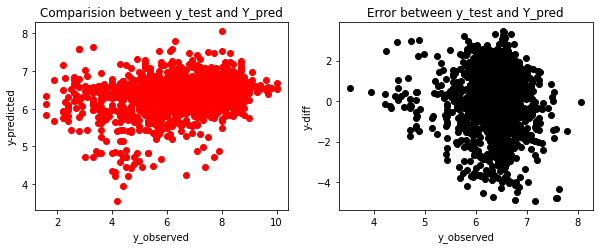

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plt.subplot(521)
plt.xlabel("y_observed")
plt.ylabel("y-predicted")
plt.scatter(y_test, y_pred, color='red')
plt.title("Comparision between y_test and Y_pred")

plt.subplot(522)
plt.scatter(y_pred, (y_test - y_pred), color='black')
plt.title("Error between y_test and Y_pred")
plt.xlabel("y_observed")
plt.ylabel("y-diff")
plt.show()


#pip install joblib

### Saving model in output directory

In [32]:
joblib.dump(model1,'../../models/model1.pkl')

['../../models/model1.pkl']

### Load trained model

In [52]:
#declare path where you saved your model
outFileFolder = '../../models/'
filePath = outFileFolder + 'model1.pkl'
#open file
file = open(filePath, "rb")
#load the trained model
trained_model = joblib.load(file)

### Predict with trained model

In [53]:
prediction = trained_model.predict(X_test)
print(prediction)

[[5.88838849]
 [6.10740272]
 [6.49174397]
 ...
 [6.50670048]
 [6.40221128]
 [6.28694689]]


### Deploy Model With Flask Web Framework

#### Create Flask application

In [76]:
####Multicollinearity

#from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns
  
# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#for i in range(len(X.columns))]
  
#print(vif_data)